## Caso 1

In [7]:
import requests

In [8]:
from bs4 import BeautifulSoup

#Obtengo la URL con la que vamos a trabajar


In [9]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"

#Transformo el contenido de la URL en un Texto




In [10]:
contenido = requests.get(url).text

#Imprimo el tipo que tiene la variable Contenido


In [11]:
print(type(contenido))

<class 'str'>


#Creamos el objeto BeutifulSoup y lo Parseamos

In [12]:
soup = BeautifulSoup(contenido, "html.parser")

#Extraemos el titulo del texto

In [13]:
h1 = soup.find_all("h1")

#Mostramos el titulo

In [14]:
print(h1)

[<h1 class="g1 ws1">LA ODISEA</h1>]


#Buscar textos en Cursiva


In [15]:
italicas = soup.find_all("i")

**La línea de código italicas = soup.find_all("i") busca todas las partes del texto que están en cursiva (dentro de etiquetas <i>) en el contenido HTML y las guarda en una lista llamada italicas.

In [16]:
print(italicas)

[<i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>in medias res, non secus
ac notas, auditorem rapit</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>De
lo sublime</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>folk-lore</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>la sacra potestad
de Alcínoo</i>, <i>Ilíada</i>, <i>bracinívea</i>, <i>ojilúcida</i>, <i>argentípeda</i>, <i>Teogonía</i>, <i>Ilíada</i>, <i>Bibliotheca scriptorum Graecorum et
Romanorum Teubneriana</i>, <i>Lexicon Homericum</i>, <i>Diccionario de
Autoridades</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Viaje de Telémaco</i>, <i>Regreso de Ulises</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Hermosilla y su Ilíada</i>, <i>y si no sé el griego</i>, <i>el griego de Homero, que no es una lengua general, sino
una de sus cuatro distintos dialectos, na

In [17]:
from collections import Counter

#Buscador de parrafos

In [18]:
parrafos = str(soup.find_all("p"))

**Esta línea de código busca todos los párrafos en el contenido HTML, los convierte en una única cadena de texto y guarda esa cadena en la variable parrafos.

#Buscar cuantes veces se repite una palabra en el parrafo

In [19]:
print(parrafos.count("Ulises"))
print(parrafos.count("Ciclope"))
print(parrafos.count("Minerva"))

1662
65
366


# Funcion para buscar palabras

In [20]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la plabra '{palabra}' {ocurrencias} veces")

#Buscar la palabra que querramos

In [21]:
buscar_palabra("Ulises")

Encontraste la plabra 'Ulises' 1708 veces


In [22]:
import random

#Buscador de parrafo aleatorio

In [29]:
parrafo = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafo).text.strip()

***Estas dos líneas de código hacen lo siguiente:

1. Buscan todos los párrafos en el contenido HTML y los almacenan en una lista.
2. Seleccionan un párrafo aleatorio de la lista.
3. Extraen el texto del párrafo seleccionado, eliminando etiquetas HTML y espacios en blanco extra.
4. Guardan el texto del párrafo aleatorio en la variable parrafo_aleatorio.

In [30]:
print(parrafo_aleatorio)

193 «¡Boyero y tú,
porquerizo! ¿Os revelaré lo que pienso ó lo mantendré oculto?
Mi ánimo me ordena que lo diga. ¿Cuáles fuerais para ayudar á
Ulises, si llegara de súbito porque alguna deidad nos lo tra[p. 288]jese? ¿Os pondríais
de parte de los pretendientes ó del propio Ulises? Contestad como
vuestro corazón y vuestro ánimo os lo dicten.»


#Contador de cantidad de palabras en el Parrafo

In [31]:
print(len(parrafo_aleatorio.split()))

59


In [32]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [33]:
import matplotlib.pyplot as plt

#Descarga corpus de stopwords en español

In [34]:
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Función para eliminar palabras y simbolos

In [35]:
def limpiar_texto(texto):
    # Lista de preposiciones, puntos, acentos, conectores, etc. a eliminar
    elementos_a_eliminar = [
        "de", "la", "el", "los", "las", "en", "a", "con", "por", "para",
        "un", "una", "unos", "unas", "y", "o", "pero", "sin", "sobre", "entre",
        "hacia", "desde", "hasta", "durante", "según", "mediante", "tras", "versus",
        ".", ",", ";", ":", "!", "¡", "¿", "?", "-", "_",
        "á", "é", "í", "ó", "ú", "ü", "ñ",  # Acentos y caracteres especiales
        # Agrega más elementos a la lista según tus necesidades
    ]

    # Convertir el texto a minúsculas
    texto_minuscula = texto.lower()

    # Eliminar acentos y caracteres especiales usando expresiones regulares
    texto_sin_acentos = re.sub(r'[^\w\s]', '', texto_minuscula)

    # Dividir el texto en palabras individuales
    lista_palabras = texto_sin_acentos.split()

    # Eliminar stopwords y elementos de la lista
    stopwords_es = set(stopwords.words('spanish'))
    palabras_importantes = [
        palabra for palabra in lista_palabras
        if palabra not in stopwords_es and palabra not in elementos_a_eliminar
    ]

    return palabras_importantes

In [36]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [37]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

#Nube de palabras

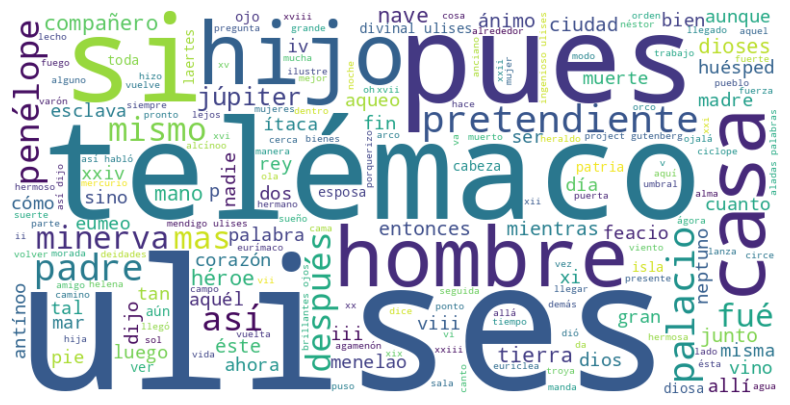

In [38]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
colores_personalizados = ['#FF0000', '#00FF00', '#0000FF']  # Rojo, verde, azul
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: random.choice(colores_personalizados)).generate(texto_limpio)

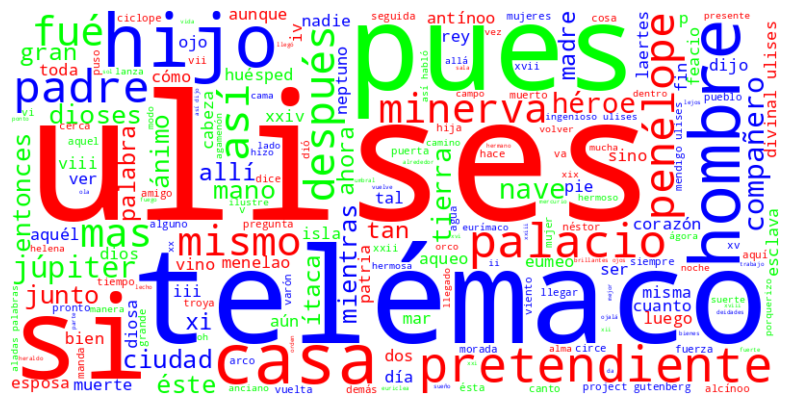

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
def limpiar_texto(texto):
    # Lista de preposiciones, puntos, acentos, conectores, etc. a eliminar
    elementos_a_eliminar = [
    "de", "la", "el", "los", "las", "en", "a", "con", "por", "para",
    "un", "una", "unos", "unas", "y", "o", "pero", "sin", "sobre", "entre",
    "hacia", "desde", "hasta", "durante", "según", "mediante", "tras", "versus",
    ".", ",", ";", ":", "!", "¡", "¿", "?", "-", "_",
    "á", "é", "í", "ó", "ú", "ü", "ñ", "a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "en", "entre",
    "hacia", "hasta", "para", "por", "según", "sin", "so", "sobre", "tras",
    "durante", "mediante", "delante de", "detrás de", "dentro de", "fuera de", "encima de",
    "debajo de", "al lado de", "en frente de", "cerca de", "lejos de",
    "a través de", "en contra de", "a favor de", "en lugar de", "a causa de",
    "a pesar de", "gracias a", "junto a", "I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X",
    "XI", "XII", "XIII", "XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX","i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x",
    "xi", "xii", "xiii", "xiv", "xv", "xvi", "xvii", "xviii", "xix", "xx"
    ]

    # Convertir el texto a minúsculas
    texto_minuscula = texto.lower()

    # Eliminar acentos y caracteres especiales usando expresiones regulares
    texto_sin_acentos = re.sub(r'[^\w\s]', '', texto_minuscula)

    # Dividir el texto en palabras individuales
    lista_palabras = texto_sin_acentos.split()

    # Eliminar stopwords y elementos de la lista
    stopwords_es = set(stopwords.words('spanish'))
    palabras_importantes = [
        palabra for palabra in lista_palabras
        if palabra not in stopwords_es and palabra not in elementos_a_eliminar
    ]

    return palabras_importantes

In [46]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [47]:
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap = "inferno").generate(texto_limpio)

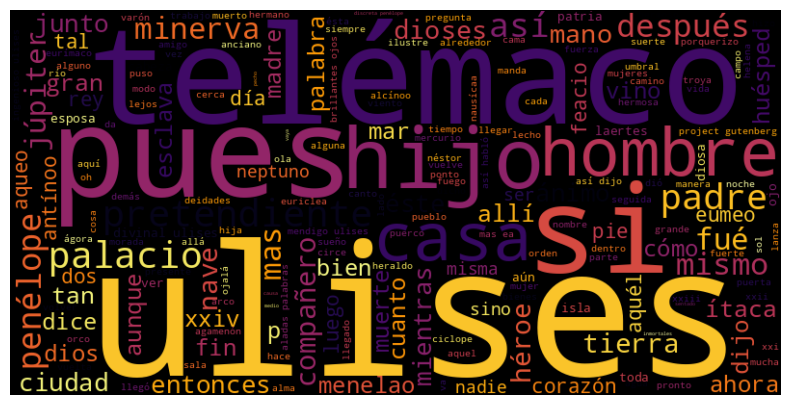

In [48]:
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Caso 2

Defino la URL

In [49]:
url_2 = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"

Trae el contenido de la URL

In [50]:
pagina = requests.get(url_2)

In [51]:
contenido = pagina.text

Creo el objeto soup

In [52]:
soup = BeautifulSoup(contenido, "html.parser")

#Consultar de primer pregunta del texto

In [53]:
pregunta = soup.find("div", {"class": "question"})
texto_pregunta = pregunta.find("div", {"class": "s-prose js-post-body"})

**Estas dos líneas de código están diseñadas para encontrar un elemento HTML específico en una página web que representa una pregunta (probablemente en Stack Overflow u otro sitio similar) y luego extraer el texto de la pregunta de ese elemento.

In [54]:
print(texto_pregunta.get_text().strip())

How do I get the current time in Python?


#Consulta de primera respuesta del texto

In [55]:
respuesta = soup.find("div", {"class": "answer"})
texto_respuesta = respuesta.find("div", {"class": "s-prose js-post-body"})
print(texto_respuesta.get_text().strip())

Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.
